In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
df = pd.read_csv('Goa.csv')

In [ ]:
df.drop(columns = ['Crime_Rate'],axis = 1,inplace = True)

In [ ]:
df.head()

,Month,Year,Hotel_Revenue,Trends,Flight_Traffic
0,January,2010,100,45,303588
1,February,2010,80,44,274509
2,March,2010,120,39,254800
3,April,2010,140,35,239143
4,May,2010,130,36,225558


In [ ]:
df['Month'] = df['Month'].map({
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
})

Q-Q Plot

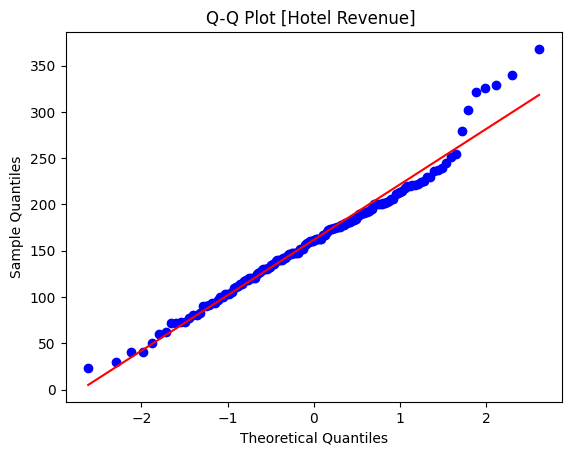

In [ ]:
stats.probplot(df['Hotel_Revenue'],dist='norm',plot=plt)
plt.title("Q-Q Plot [Hotel Revenue] ")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

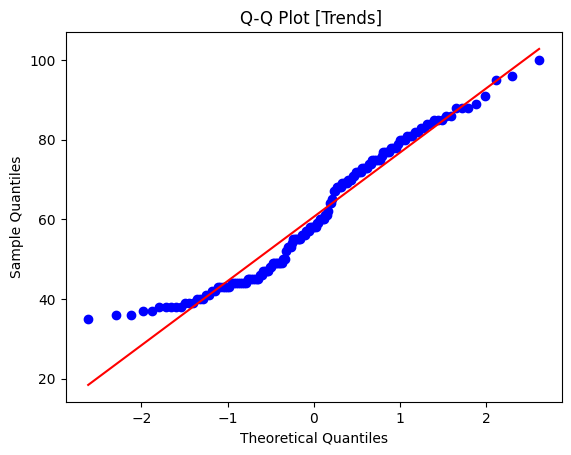

In [ ]:
stats.probplot(df['Trends'],dist='norm',plot=plt)
plt.title("Q-Q Plot [Trends] ")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

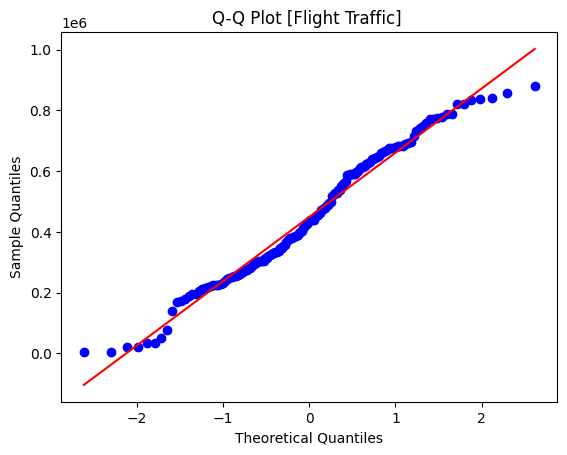

In [ ]:
stats.probplot(df['Flight_Traffic'],dist='norm',plot=plt)
plt.title("Q-Q Plot [Flight Traffic] ")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Heatmap

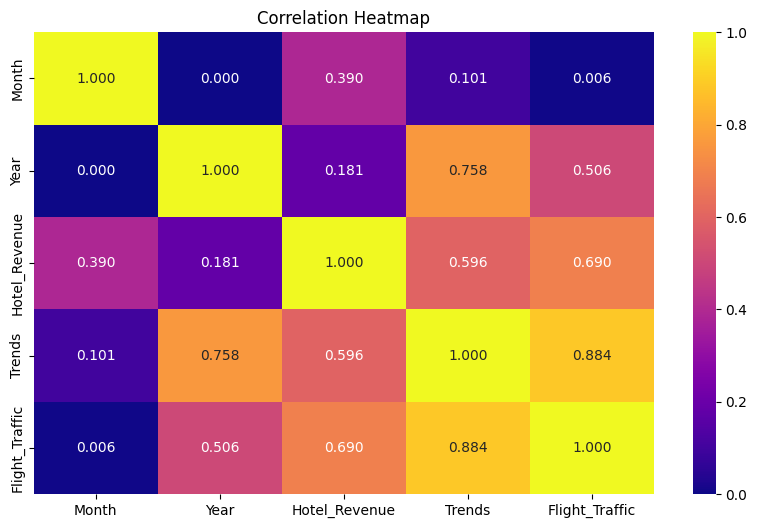

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".3f")

plt.title("Correlation Heatmap")

plt.show()

**Pairplot**

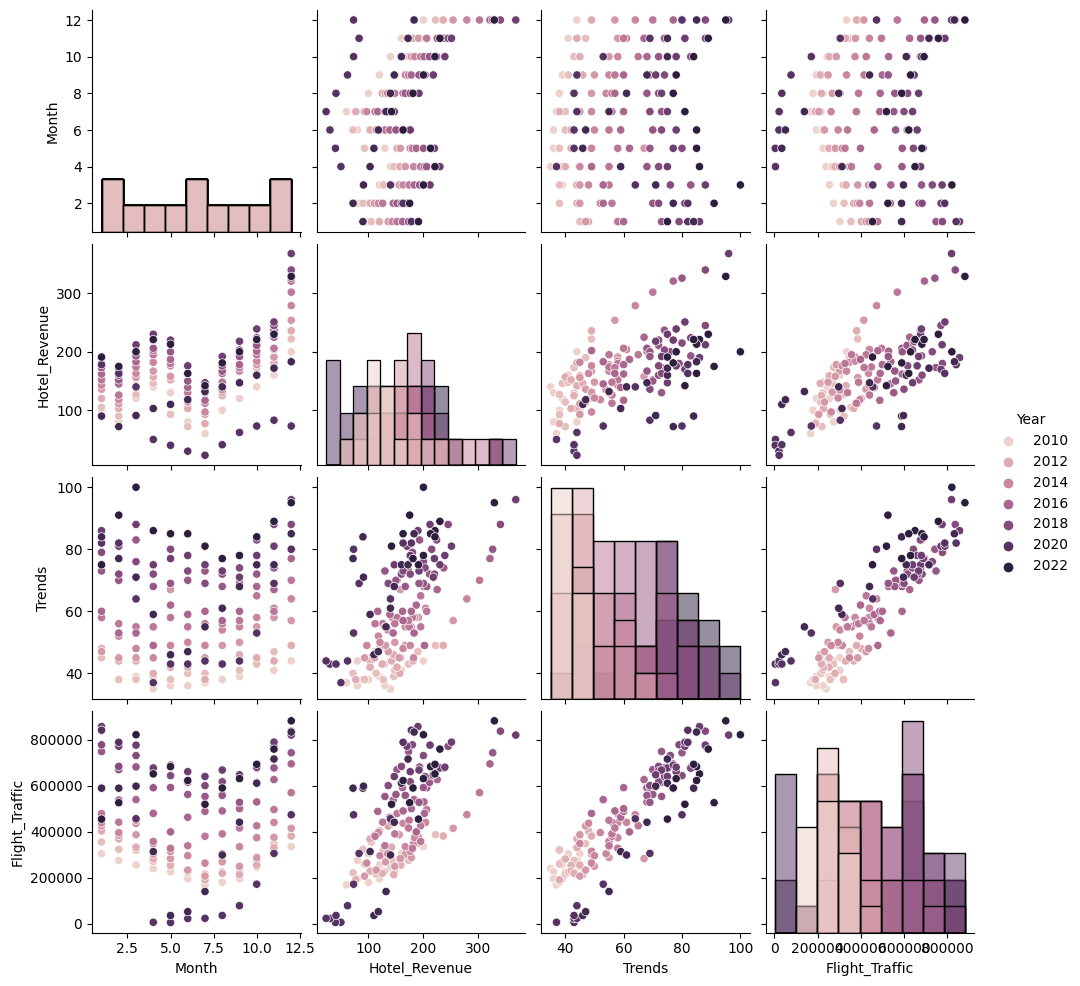

In [ ]:
sns.pairplot(df,hue="Year", diag_kind="hist")

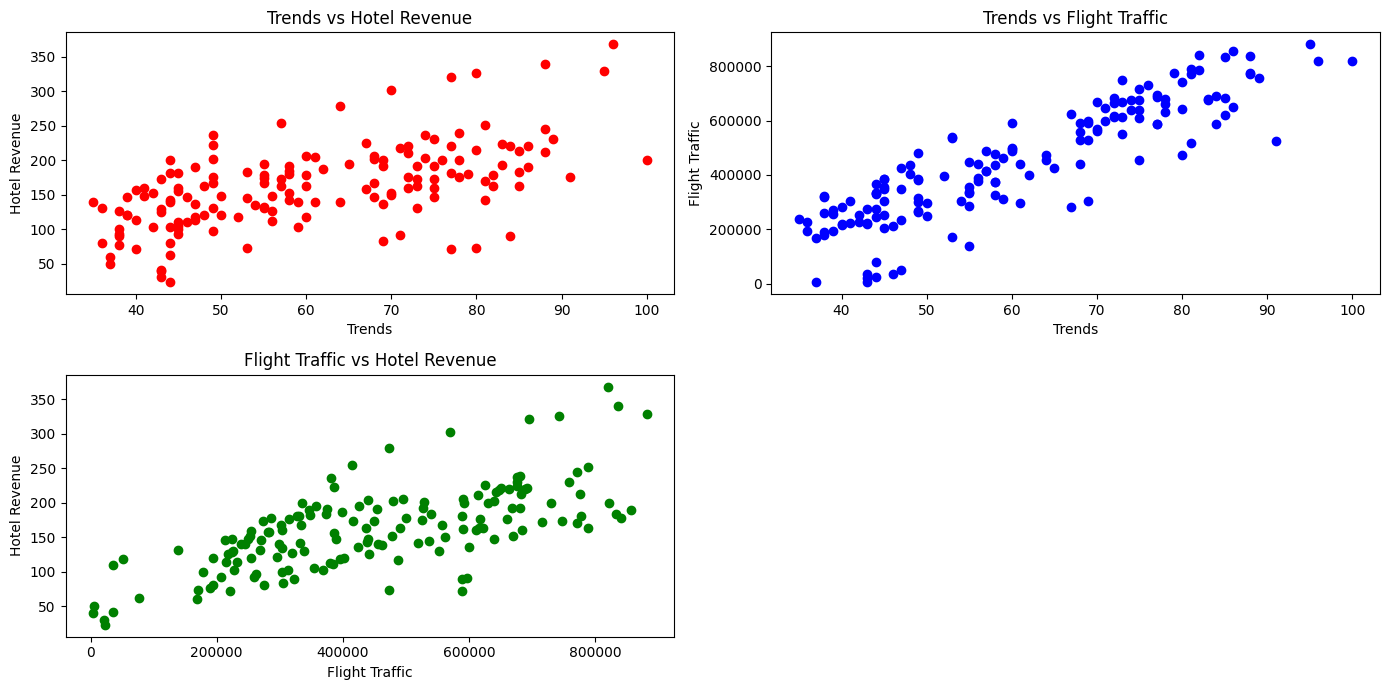

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(221)
plt.scatter(df['Trends'], df['Hotel_Revenue'],c='r')
plt.xlabel('Trends')
plt.ylabel('Hotel Revenue')
plt.title('Trends vs Hotel Revenue')

plt.subplot(222)
plt.scatter(df['Trends'], df['Flight_Traffic'],c='b')
plt.xlabel('Trends')
plt.ylabel('Flight Traffic')
plt.title('Trends vs Flight Traffic')

plt.subplot(223)
plt.scatter(df['Flight_Traffic'], df['Hotel_Revenue'],c='g')
plt.xlabel('Flight Traffic')
plt.ylabel('Hotel Revenue')
plt.title('Flight Traffic vs Hotel Revenue')
plt.tight_layout()

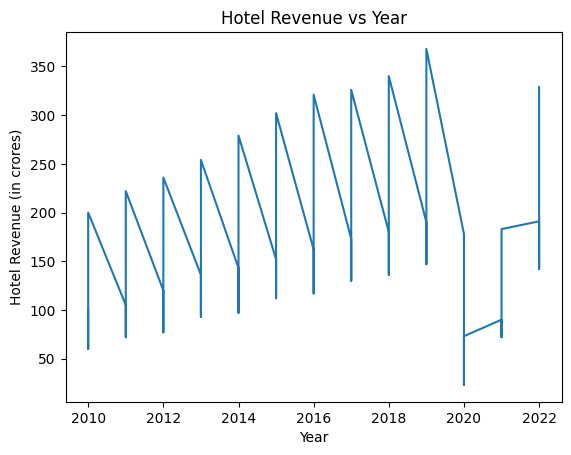

In [ ]:
plt.plot(df['Year'],df['Hotel_Revenue'])
plt.title("Hotel Revenue vs Year")
plt.xlabel("Year")
plt.ylabel("Hotel Revenue (in crores)")
plt.show()

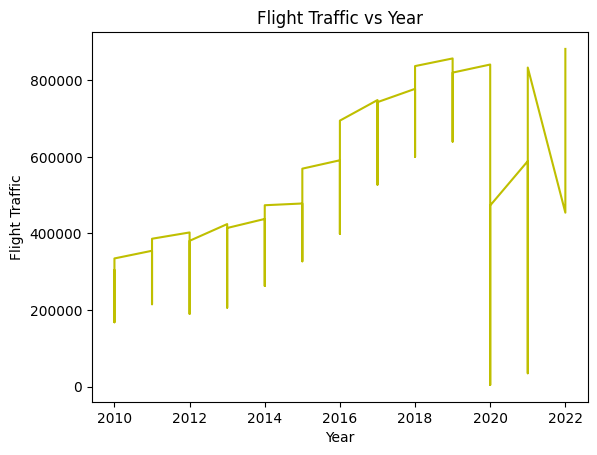

In [ ]:
plt.plot(df['Year'],df['Flight_Traffic'],c='y')
plt.title("Flight Traffic vs Year")
plt.xlabel("Year")
plt.ylabel("Flight Traffic")
plt.show()

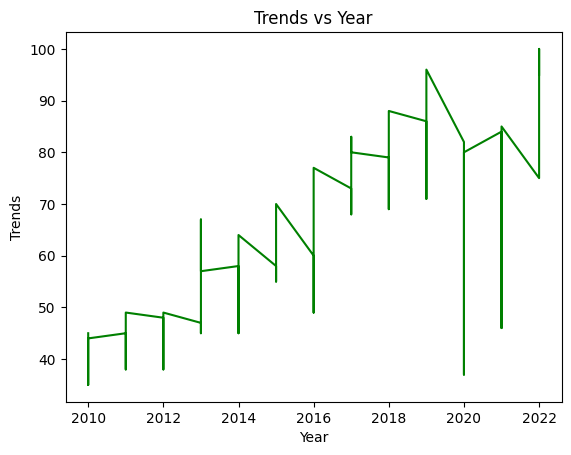

In [ ]:
plt.plot(df['Year'],df['Trends'],c='g')
plt.title("Trends vs Year")
plt.xlabel("Year")
plt.ylabel("Trends")
plt.show()

Seasonal Decomposition

In [ ]:
from statsmodels.tsa.seasonal import STL

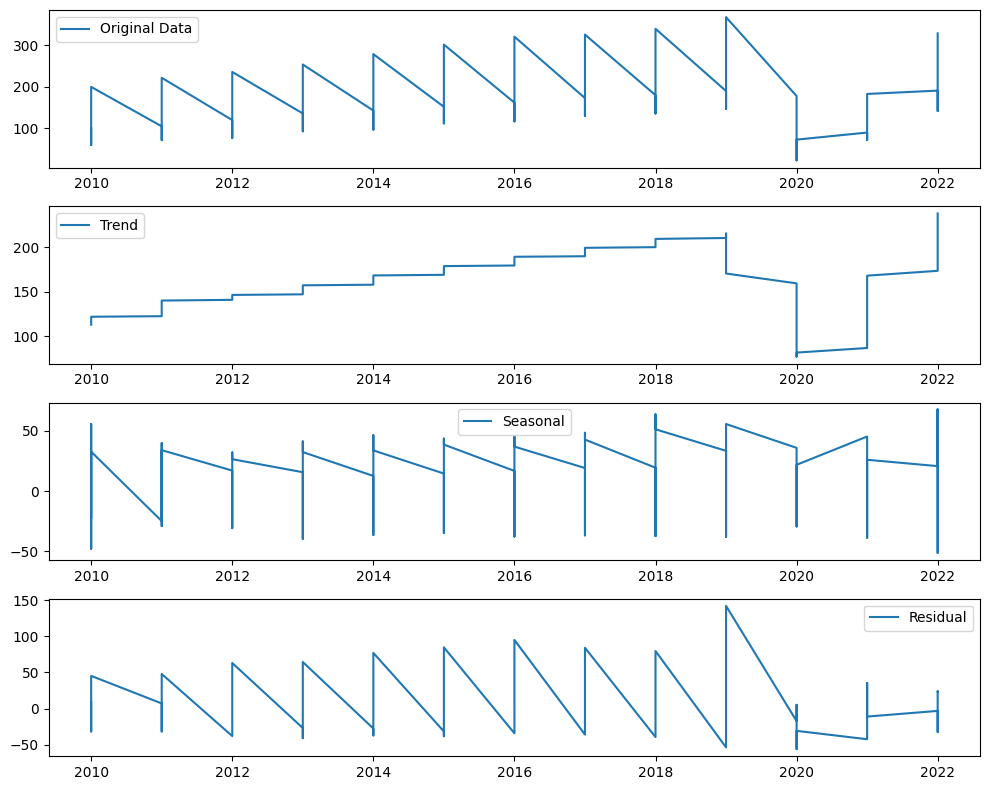

In [ ]:
# Perform STL decomposition
stl = STL(df['Hotel_Revenue'], 13)  # 'seasonal' parameter is set to 13 for monthly data

result = stl.fit()

# Extract the components
trend, seasonal, residual = result.trend, result.seasonal, result.resid

# Plot the components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['Year'],df['Hotel_Revenue'], label='Original Data')
plt.legend()

plt.subplot(412)
plt.plot(df['Year'],trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(df['Year'],seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(df['Year'],residual, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

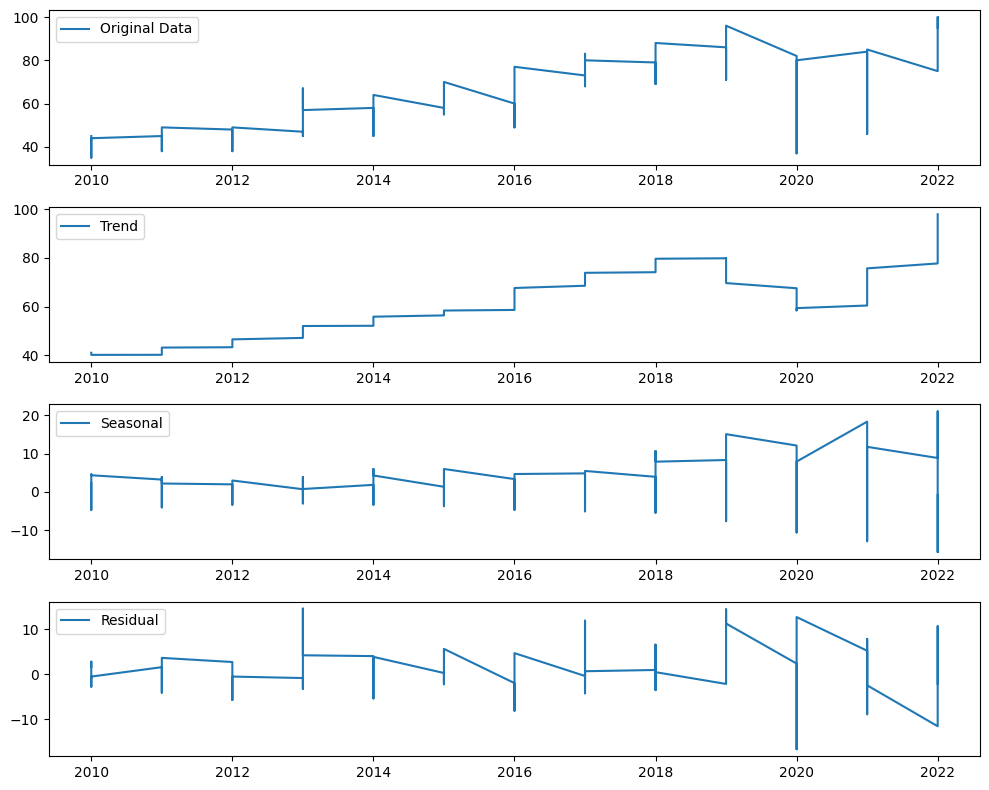

In [ ]:
# Perform STL decomposition
stl = STL(df['Trends'], 13)  # 'seasonal' parameter is set to 13 for monthly data

result = stl.fit()

# Extract the components
trend, seasonal, residual = result.trend, result.seasonal, result.resid

# Plot the components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['Year'],df['Trends'], label='Original Data')
plt.legend()

plt.subplot(412)
plt.plot(df['Year'],trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(df['Year'],seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(df['Year'],residual, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

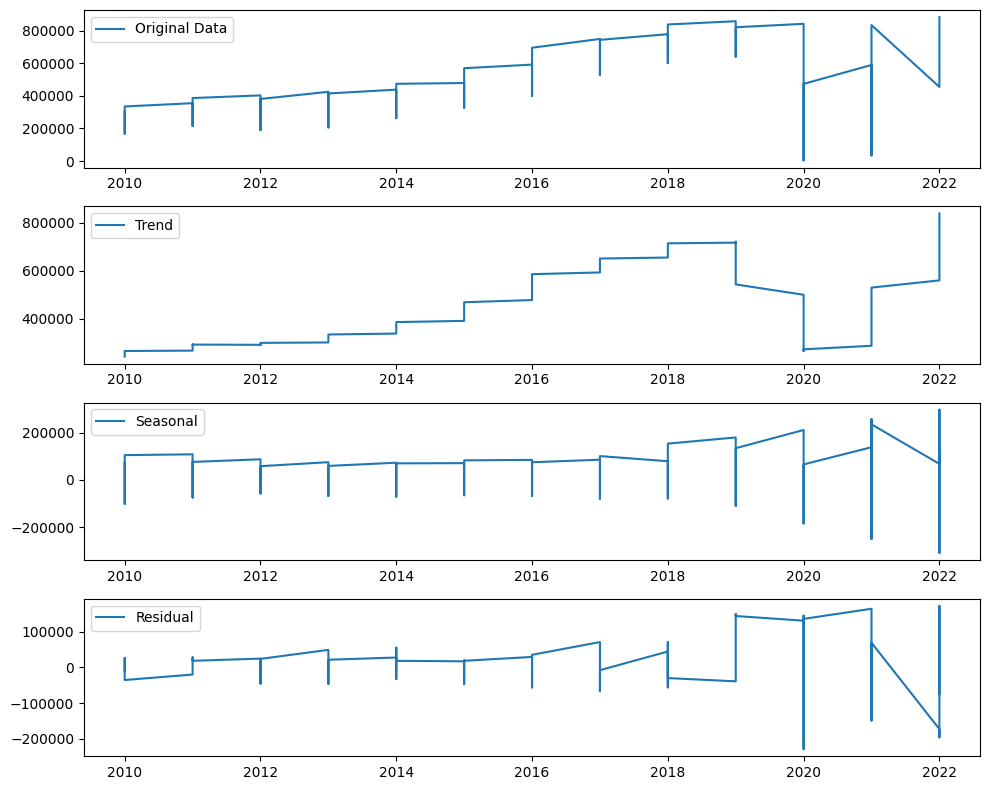

In [ ]:
# Perform STL decomposition
stl = STL(df['Flight_Traffic'], 13)  # 'seasonal' parameter is set to 13 for monthly data

result = stl.fit()

# Extract the components
trend, seasonal, residual = result.trend, result.seasonal, result.resid

# Plot the components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['Year'],df['Flight_Traffic'], label='Original Data')
plt.legend()

plt.subplot(412)
plt.plot(df['Year'],trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(df['Year'],seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(df['Year'],residual, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

ACF and PACF

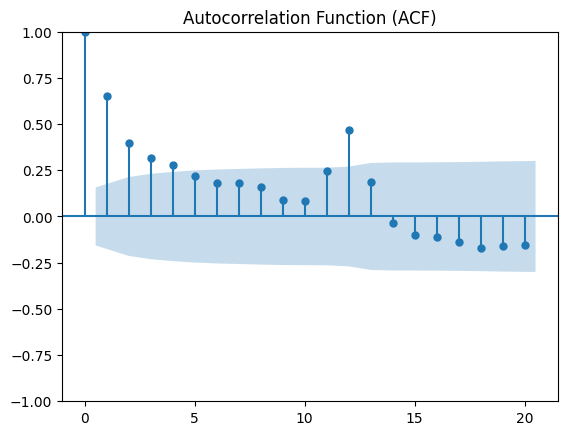

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Hotel_Revenue'], lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

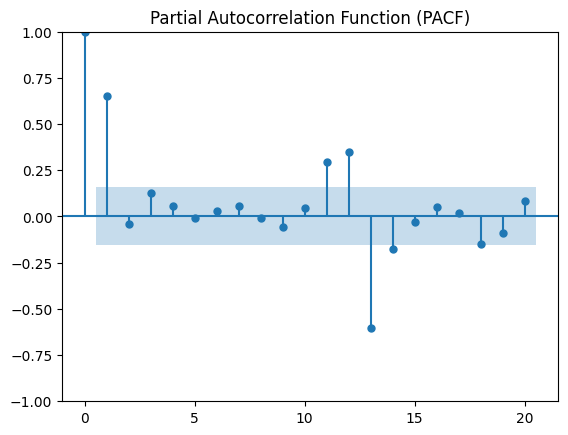

In [ ]:
plot_pacf(df['Hotel_Revenue'], lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

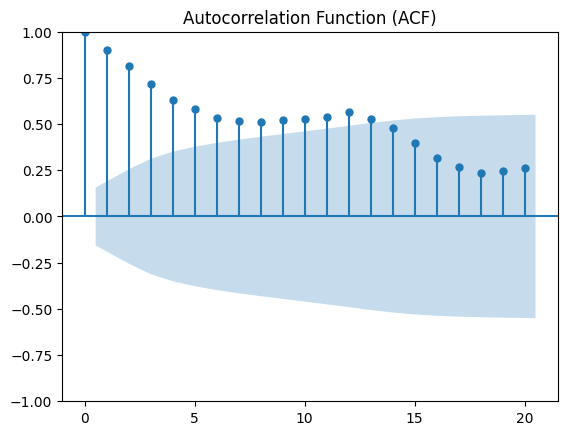

In [ ]:
plot_acf(df['Trends'], lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

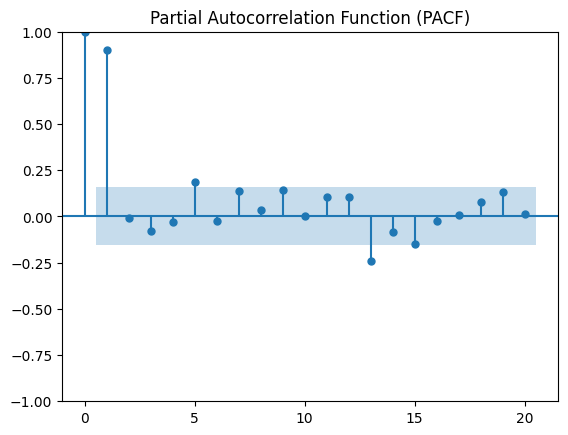

In [ ]:
plot_pacf(df['Trends'], lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

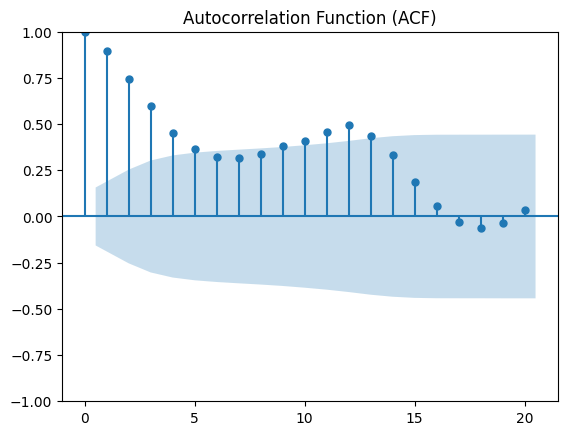

In [ ]:
plot_acf(df['Flight_Traffic'], lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

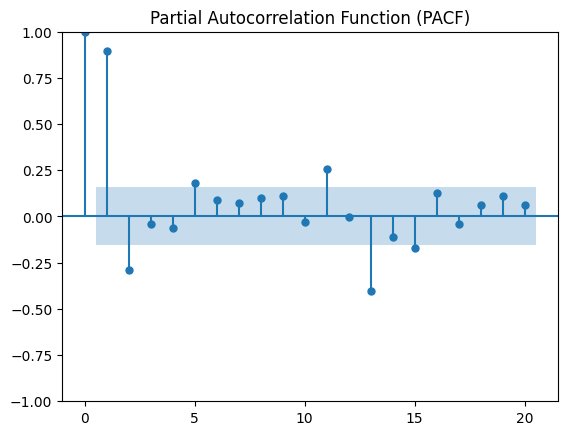

In [ ]:
plot_pacf(df['Flight_Traffic'], lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

BOX plot

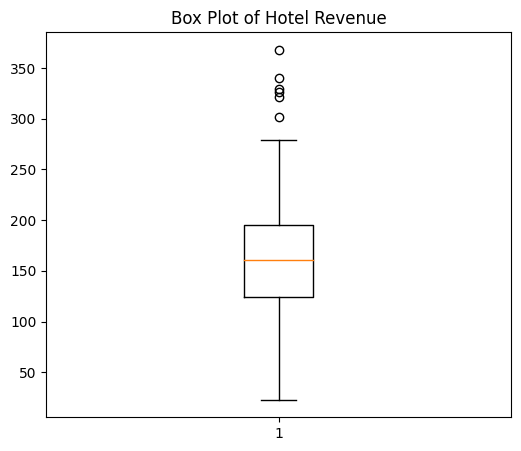

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot(df['Hotel_Revenue'])
plt.title("Box Plot of Hotel Revenue")
plt.show()

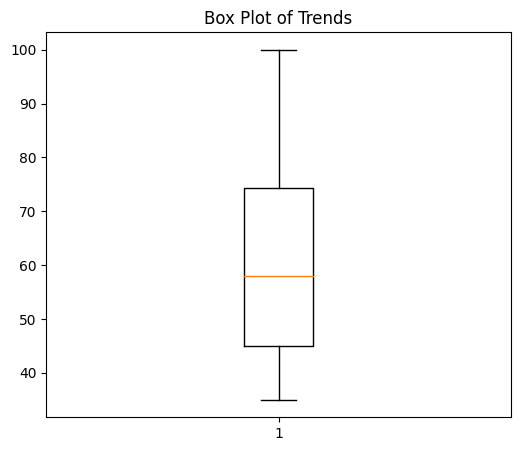

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot(df['Trends'])
plt.title("Box Plot of Trends")
plt.show()

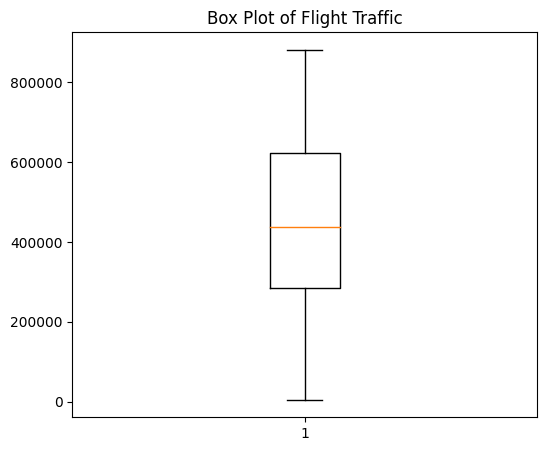

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot(df['Flight_Traffic'])
plt.title("Box Plot of Flight Traffic")
plt.show()

Violine Plot

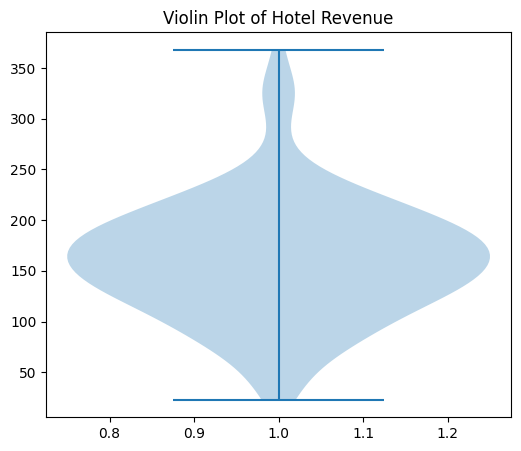

In [ ]:
plt.figure(figsize=(6, 5))
plt.violinplot(df['Hotel_Revenue'])
plt.title("Violin Plot of Hotel Revenue")
plt.show()

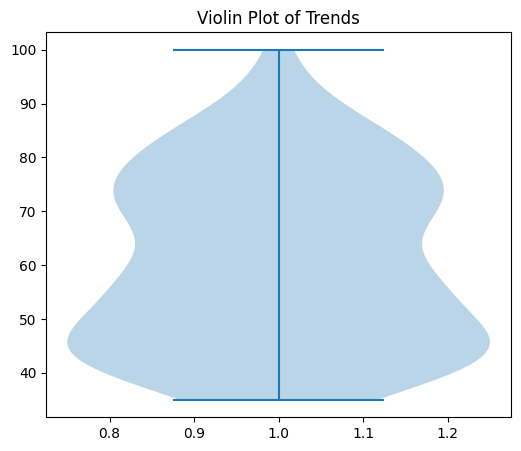

In [ ]:
plt.figure(figsize=(6, 5))
plt.violinplot(df['Trends'])
plt.title("Violin Plot of Trends")
plt.show()

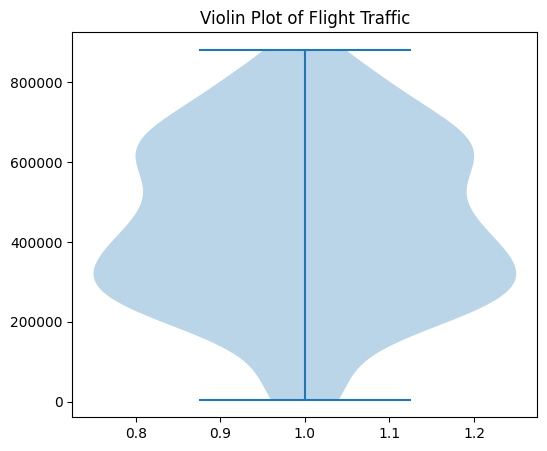

In [ ]:
plt.figure(figsize=(6, 5))
plt.violinplot(df['Flight_Traffic'])
plt.title("Violin Plot of Flight Traffic")
plt.show()